## IPL MATCH PREDICTOR


In [1]:
##importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
##loading the csv files into dataframes

match_df = pd.read_csv("IPL_Matches_2008_2022.csv")
dlvr_df = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
match_df.sample(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
428,829745,Bangalore,22/04/2015,2015,20,Royal Challengers Bangalore,Chennai Super Kings,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Chennai Super Kings,Runs,27.0,NaN,SK Raina,"['MS Bisla', 'RR Rossouw', 'V Kohli', 'KD Kart...","['DR Smith', 'BB McCullum', 'SK Raina', 'MS Dh...",JD Cloete,C Shamshuddin
883,336004,Mumbai,04/05/2008,2007/08,23,Mumbai Indians,Delhi Daredevils,Dr DY Patil Sports Academy,Delhi Daredevils,field,N,Mumbai Indians,Runs,29.0,NaN,SM Pollock,"['YV Takawale', 'ST Jayasuriya', 'DJ Thornely'...","['G Gambhir', 'V Sehwag', 'S Dhawan', 'AB de V...",IL Howell,RE Koertzen
150,1181768,Hyderabad,12/05/2019,2019,Final,Mumbai Indians,Chennai Super Kings,Rajiv Gandhi International Stadium,Mumbai Indians,bat,N,Mumbai Indians,Runs,1.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['F du Plessis', 'SR Watson', 'SK Raina', 'AT ...",IJ Gould,Nitin Menon
560,598020,Delhi,18/04/2013,2013,24,Delhi Daredevils,Chennai Super Kings,Feroz Shah Kotla,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,86.0,NaN,MEK Hussey,"['DA Warner', 'V Sehwag', 'MC Juneja', 'DPMD J...","['MEK Hussey', 'M Vijay', 'SK Raina', 'MS Dhon...",M Erasmus,VA Kulkarni
399,829803,Chandigarh,13/05/2015,2015,50,Kings XI Punjab,Royal Challengers Bangalore,"Punjab Cricket Association Stadium, Mohali",Royal Challengers Bangalore,field,N,Kings XI Punjab,Runs,22.0,NaN,AR Patel,"['WP Saha', 'M Vohra', 'GJ Maxwell', 'DA Mille...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...",JD Cloete,C Shamshuddin
188,1178397,Chandigarh,08/04/2019,2019,22,Sunrisers Hyderabad,Kings XI Punjab,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,6.0,NaN,KL Rahul,"['DA Warner', 'JM Bairstow', 'V Shankar', 'Moh...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'DA Mil...",AY Dandekar,M Erasmus
755,419141,Nagpur,05/04/2010,2009/10,36,Deccan Chargers,Rajasthan Royals,"Vidarbha Cricket Association Stadium, Jamtha",Rajasthan Royals,bat,N,Rajasthan Royals,Runs,2.0,NaN,SK Warne,"['VVS Laxman', 'AC Gilchrist', 'RG Sharma', 'A...","['MJ Lumb', 'NV Ojha', 'FY Fazal', 'SR Watson'...",HDPK Dharmasena,SJA Taufel
436,829729,Mumbai,17/04/2015,2015,12,Mumbai Indians,Chennai Super Kings,Wankhede Stadium,Mumbai Indians,bat,N,Chennai Super Kings,Wickets,6.0,NaN,A Nehra,"['LMP Simmons', 'PA Patel', 'CJ Anderson', 'RG...","['DR Smith', 'BB McCullum', 'SK Raina', 'F du ...",AK Chaudhary,M Erasmus
766,419130,Mumbai,28/03/2010,2009/10,25,Deccan Chargers,Mumbai Indians,Dr DY Patil Sports Academy,Deccan Chargers,field,N,Mumbai Indians,Runs,41.0,NaN,Harbhajan Singh,"['AC Gilchrist', 'MD Mishra', 'HH Gibbs', 'A S...","['S Dhawan', 'SR Tendulkar', 'DJ Bravo', 'SS T...",S Das,K Hariharan
251,1136578,Kolkata,21/04/2018,2018,18,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,9.0,D/L,KL Rahul,"['CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'KK Nai...",A Deshmukh,C Shamshuddin


In [3]:
match_df.shape

(906, 20)

In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               906 non-null    int64  
 1   City             855 non-null    object 
 2   Date             906 non-null    object 
 3   Season           906 non-null    object 
 4   MatchNumber      906 non-null    object 
 5   Team1            906 non-null    object 
 6   Team2            906 non-null    object 
 7   Venue            906 non-null    object 
 8   TossWinner       906 non-null    object 
 9   TossDecision     906 non-null    object 
 10  SuperOver        902 non-null    object 
 11  WinningTeam      902 non-null    object 
 12  WonBy            906 non-null    object 
 13  Margin           888 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  902 non-null    object 
 16  Team1Players     906 non-null    object 
 17  Team2Players    

In [5]:
dlvr_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304076.0,1.0,0.0,1.0,JC Buttler,UT Yadav,D Padikkal,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,1304076.0,1.0,0.0,2.0,JC Buttler,UT Yadav,D Padikkal,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,1304076.0,1.0,0.0,3.0,JC Buttler,UT Yadav,D Padikkal,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,1304076.0,1.0,0.0,4.0,JC Buttler,UT Yadav,D Padikkal,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,1304076.0,1.0,0.0,5.0,JC Buttler,UT Yadav,D Padikkal,noballs,1.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
dlvr_df.shape

(215369, 17)

In [7]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215369 entries, 0 to 215368
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 215368 non-null  float64
 1   innings            215368 non-null  float64
 2   overs              215368 non-null  float64
 3   ballnumber         215368 non-null  float64
 4   batter             215368 non-null  object 
 5   bowler             215368 non-null  object 
 6   non-striker        215368 non-null  object 
 7   extra_type         11420 non-null   object 
 8   batsman_run        215368 non-null  float64
 9   extras_run         215368 non-null  float64
 10  total_run          215368 non-null  float64
 11  non_boundary       215368 non-null  float64
 12  isWicketDelivery   215368 non-null  float64
 13  player_out         10608 non-null   object 
 14  kind               10608 non-null   object 
 15  fielders_involved  7558 non-null    object 
 16  Ba

# Exploratory Data Analysis

Looking at all the teams in the teams and winners' column

Checking for missing values for the no result matches

Encoding Team Names

Visualizing the toss wins and match wins by each tea

In [8]:
match_df['WinningTeam'].value_counts()

Mumbai Indians                 127
Chennai Super Kings            118
Kolkata Knight Riders          111
Royal Challengers Bangalore    104
Rajasthan Royals                90
Kings XI Punjab                 88
Sunrisers Hyderabad             73
Delhi Daredevils                67
Delhi Capitals                  31
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Punjab Kings                     9
Kochi Tuskers Kerala             6
Gujarat Titans                   5
Rising Pune Supergiants          5
Lucknow Super Giants             4
Name: WinningTeam, dtype: int64

In [9]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    119
Mumbai Indians                 110
Chennai Super Kings            106
Kolkata Knight Riders          102
Kings XI Punjab                 92
Delhi Daredevils                85
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 39
Delhi Capitals                  26
Pune Warriors                   23
Gujarat Lions                   16
Punjab Kings                    14
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Gujarat Titans                   3
Lucknow Super Giants             3
Name: Team1, dtype: int64

In [10]:
# Extracting the records where the team won batting first

batting_first = match_df[match_df['WonBy']== 'Runs']


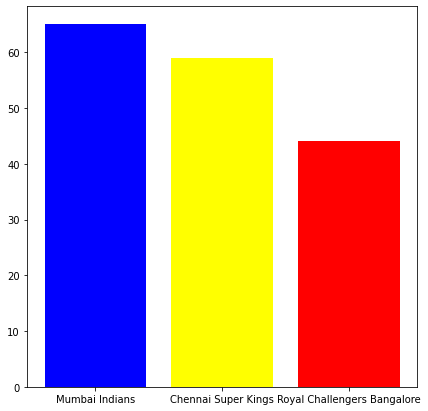

In [11]:
# Making a bar plot for top 3 teams after batting first

plt.figure(figsize=(7,7))
plt.bar(list(batting_first['WinningTeam'].value_counts()[0:3].keys()), list(batting_first['WinningTeam'].value_counts()[0:3]), color=["blue", "yellow", "red"])
plt.show()
    

In [12]:
# Extracting the records where a team has won after batting second
batting_second= match_df[match_df['WonBy']!='Runs']

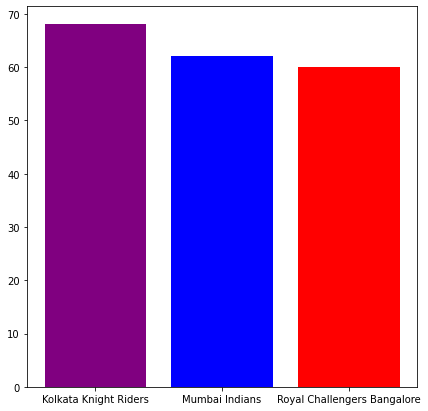

In [13]:
# Making a bar plot for top 3 teams after batting first

plt.figure(figsize=(7,7))
plt.bar(list(batting_second['WinningTeam'].value_counts()[0:3].keys()), list(batting_second['WinningTeam'].value_counts()[0:3]), color=["purple", "blue", "red"])
plt.show()
    

In [14]:
# looking at the no of matches played each season
match_per_season = match_df.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'Matches'})
match_per_season

,Season,Matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Matches played each season')

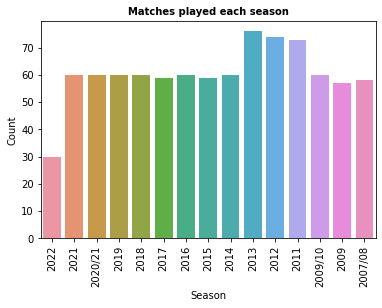

In [15]:
# Making a bar to show the nonof matches played each season

sns.countplot(match_df['Season'])
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Matches played each season", fontsize=10, fontweight='bold')

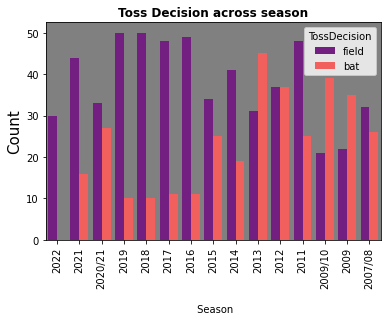

In [16]:
# extracting the records of matches where teams choosing to bat or field first in each season

ax = plt.axes()
ax.set(facecolor="grey")
sns.countplot(x='Season', hue='TossDecision', data=match_df, palette="magma", saturation=1)
plt.xticks(rotation="90", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season', fontsize=10)
plt.ylabel('Count', fontsize=15)
plt.title('Toss Decision across season', fontsize=12, fontweight="bold")
plt.show()           

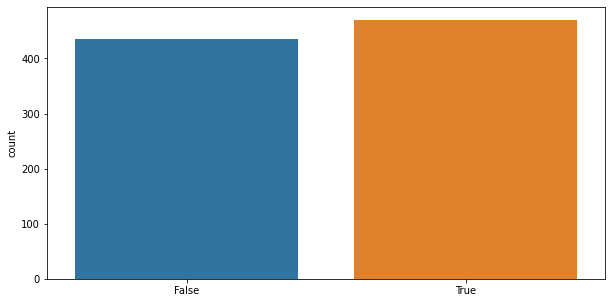

In [17]:
# Extracting the results of the teams winning the toss = winning the match

toss = match_df['TossWinner']== match_df['WinningTeam']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

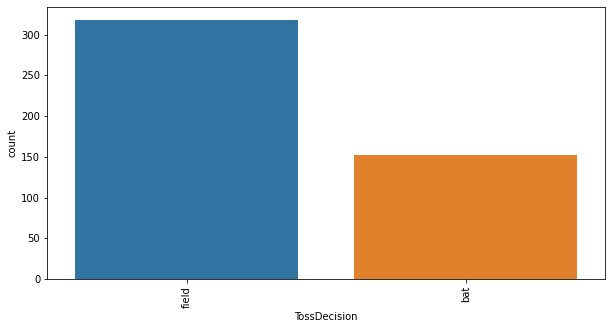

In [18]:
#Extracting the records of the team after winning the toss = winning the match by electing to bat or field first

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
sns.countplot(match_df.TossDecision[match_df.TossWinner == match_df.WinningTeam])
plt.show()

In [19]:
match_df[match_df['WinningTeam'].isnull() == True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
161,1178424,Bengaluru,30/04/2019,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
394,829813,Bangalore,17/05/2015,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
420,829763,Bangalore,29/04/2015,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
664,501265,Delhi,21/05/2011,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [20]:
##replacing null results with draw
match_df['WinningTeam'].fillna('Draw', inplace=True)

In [21]:
match_df[match_df['WinningTeam'].isnull() == True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2


# Encoding Team Names

In [22]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Punjab Kings': 15,
    'Gujarat Titans': 16,
    'Lucknow Super Giants': 17,
    'Draw': 18
}

team_encode_dict = {'Team1': team_encodings,
                    'Team2': team_encodings,
                    'TossWinner': team_encodings,
                    'WinningTeam': team_encodings,
                    'Venue' : team_encodings,
                    'City' : team_encodings,
                    'TossDecision' : team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304076,Mumbai,18/04/2022,2022,30,6,2,"Brabourne Stadium, Mumbai",2,field,N,6,Runs,7.0,NaN,YS Chahal,"['JC Buttler', 'D Padikkal', 'SV Samson', 'SO ...","['AJ Finch', 'SP Narine', 'SS Iyer', 'N Rana',...",GR Sadashiv Iyer,VK Sharma
1,1304075,Pune,17/04/2022,2022,29,5,16,"Maharashtra Cricket Association Stadium, Pune",16,field,N,16,Wickets,3.0,NaN,DA Miller,"['RD Gaikwad', 'RV Uthappa', 'MM Ali', 'AT Ray...","['WP Saha', 'Shubman Gill', 'V Shankar', 'A Ma...",KN Ananthapadmanabhan,UV Gandhe
2,1304074,Mumbai,17/04/2022,2022,28,15,10,"Dr DY Patil Sports Academy, Mumbai",10,field,N,10,Wickets,7.0,NaN,Umran Malik,"['S Dhawan', 'P Simran Singh', 'JM Bairstow', ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",PG Pathak,R Pandit
3,1304073,Mumbai,16/04/2022,2022,27,3,14,"Wankhede Stadium, Mumbai",14,field,N,3,Runs,16.0,NaN,KD Karthik,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...","['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...",Chirra Ravikanthreddy,J Madanagopal
4,1304072,Mumbai,16/04/2022,2022,26,17,1,"Brabourne Stadium, Mumbai",1,field,N,17,Runs,18.0,NaN,KL Rahul,"['KL Rahul', 'Q de Kock', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",AK Chaudhary,NA Patwardhan


In [23]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               906 non-null    int64  
 1   City             855 non-null    object 
 2   Date             906 non-null    object 
 3   Season           906 non-null    object 
 4   MatchNumber      906 non-null    object 
 5   Team1            906 non-null    int64  
 6   Team2            906 non-null    int64  
 7   Venue            906 non-null    object 
 8   TossWinner       906 non-null    int64  
 9   TossDecision     906 non-null    object 
 10  SuperOver        902 non-null    object 
 11  WinningTeam      906 non-null    int64  
 12  WonBy            906 non-null    object 
 13  Margin           888 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  902 non-null    object 
 16  Team1Players     906 non-null    object 
 17  Team2Players    

In [24]:
match_df['City'].value_counts()

Mumbai            135
Delhi              78
Kolkata            77
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Jaipur             47
Pune               44
Abu Dhabi          37
Ahmedabad          17
Durban             15
Bengaluru          15
Visakhapatnam      13
Dubai              13
Centurion          12
Sharjah            10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Cuttack             7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: City, dtype: int64

In [25]:
## checking for missing values
match_df[match_df['City'].isnull() == True ]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
90,1237181,NaN,10/11/2020,2020/21,Final,14,1,Dubai International Cricket Stadium,14,bat,N,1,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
93,1237177,NaN,05/11/2020,2020/21,Qualifier 1,1,14,Dubai International Cricket Stadium,14,field,N,1,Runs,57.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
94,1216495,NaN,03/11/2020,2020/21,56,1,10,Sharjah Cricket Stadium,10,field,N,10,Wickets,10.0,NaN,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
96,1216530,NaN,01/11/2020,2020/21,54,2,6,Dubai International Cricket Stadium,6,field,N,2,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
98,1216502,NaN,31/10/2020,2020/21,52,3,10,Sharjah Cricket Stadium,10,field,N,10,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
99,1216535,NaN,31/10/2020,2020/21,51,14,1,Dubai International Cricket Stadium,1,field,N,1,Wickets,9.0,NaN,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
101,1216536,NaN,29/10/2020,2020/21,49,2,5,Dubai International Cricket Stadium,5,field,N,5,Wickets,6.0,NaN,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
103,1216524,NaN,27/10/2020,2020/21,47,10,14,Dubai International Cricket Stadium,14,field,N,10,Runs,88.0,NaN,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
104,1216520,NaN,26/10/2020,2020/21,46,2,9,Sharjah Cricket Stadium,9,field,N,9,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
106,1216544,NaN,25/10/2020,2020/21,44,3,5,Dubai International Cricket Stadium,3,bat,N,5,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth


In [26]:
match_df['City'].fillna('Dubai',inplace=True)
match_df.describe()

,ID,Team1,Team2,TossWinner,WinningTeam,Margin
count,9.060000e+02,906.000000,906.000000,906.000000,906.000000,888.000000
mean,8.074485e+05,5.810155,5.841060,5.714128,5.721854,16.960586
std,3.286658e+05,3.776248,3.748902,3.725818,3.873969,21.619952
min,3.359820e+05,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.012502e+05,3.000000,2.250000,2.000000,2.000000,6.000000
50%,7.340400e+05,5.000000,5.000000,5.000000,5.000000,8.000000
75%,1.136604e+06,9.000000,9.000000,9.000000,9.000000,19.000000
max,1.304076e+06,17.000000,17.000000,17.000000,18.000000,146.000000


In [27]:
match_df = match_df[['ID', 'Team1','Team2','City','TossDecision','TossWinner','Venue','WinningTeam']]
match_df.head()

,ID,Team1,Team2,City,TossDecision,TossWinner,Venue,WinningTeam
0,1304076,6,2,Mumbai,field,2,"Brabourne Stadium, Mumbai",6
1,1304075,5,16,Pune,field,16,"Maharashtra Cricket Association Stadium, Pune",16
2,1304074,15,10,Mumbai,field,10,"Dr DY Patil Sports Academy, Mumbai",10
3,1304073,3,14,Mumbai,field,14,"Wankhede Stadium, Mumbai",3
4,1304072,17,1,Mumbai,field,1,"Brabourne Stadium, Mumbai",17


In [28]:
match_df.describe()

,ID,Team1,Team2,TossWinner,WinningTeam
count,9.060000e+02,906.000000,906.000000,906.000000,906.000000
mean,8.074485e+05,5.810155,5.841060,5.714128,5.721854
std,3.286658e+05,3.776248,3.748902,3.725818,3.873969
min,3.359820e+05,1.000000,1.000000,1.000000,1.000000
25%,5.012502e+05,3.000000,2.250000,2.000000,2.000000
50%,7.340400e+05,5.000000,5.000000,5.000000,5.000000
75%,1.136604e+06,9.000000,9.000000,9.000000,9.000000
max,1.304076e+06,17.000000,17.000000,17.000000,18.000000


In [29]:
##looking at number of toss wins and match wins
toss_wins = match_df['WinningTeam'].value_counts(sort=True)
match_wins = match_df['WinningTeam'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['WinningTeam'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 127
Chennai Super Kings -> 118
Kolkata Knight Riders -> 111
Royal Challengers Bangalore -> 104
Rajasthan Royals -> 90
Kings XI Punjab -> 88
Sunrisers Hyderabad -> 73
Delhi Daredevils -> 67
Pune Warriors -> 31
Deccan Chargers -> 29
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Delhi Capitals -> 9
Rising Pune Supergiant -> 6
Punjab Kings -> 5
Gujarat Titans -> 4
Lucknow Super Giants -> 4


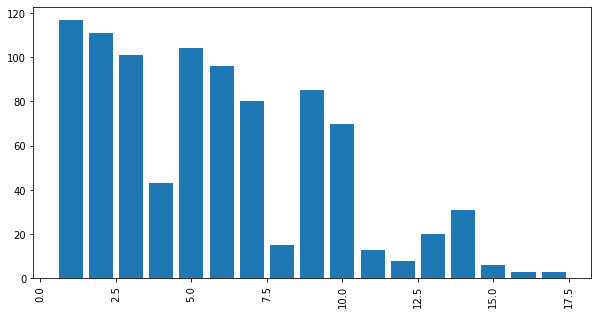

In [30]:
# making a bar plot for the teams w.r.t most no of toss wins

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90, fontsize=10)
plt.bar(list(match_df['TossWinner'].value_counts().keys()), list(match_df['TossWinner'].value_counts()))
plt.show()             

<AxesSubplot:>

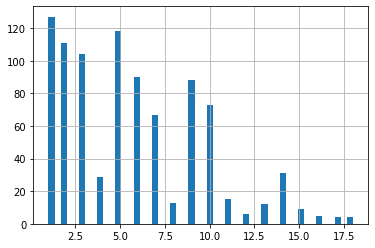

In [31]:
match_df['WinningTeam'].hist(bins=50)

In [32]:
match_df['WinningTeam'].value_counts()

1     127
5     118
2     111
3     104
6      90
9      88
10     73
7      67
14     31
4      29
11     15
8      13
13     12
15      9
12      6
16      5
17      4
18      4
Name: WinningTeam, dtype: int64

Text(0.5, 1.0, 'Match winners')

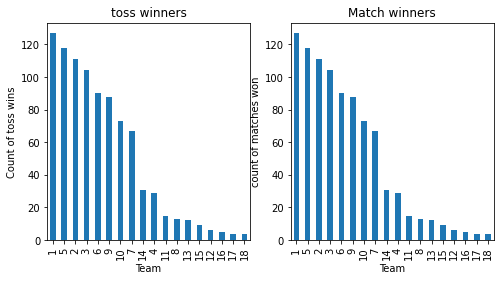

In [33]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [34]:
match_df.isnull().sum()

ID              0
Team1           0
Team2           0
City            0
TossDecision    0
TossWinner      0
Venue           0
WinningTeam     0
dtype: int64

In [35]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['City', 'TossDecision', 'Venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur'
 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['Arun Jaitley Stadium' 'Arun Jaitley Stadium, Delhi' 'Barabati Stadium'
 'Brabourne Stadium' 'Brabourne Stadium, Mumbai' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr DY Patil Sports Academy, Mumbai'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M.Chinnaswamy Stadium' 'MA Chidambaram Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'MA Chidambaram Stadium

,ID,Team1,Team2,City,TossDecision,TossWinner,Venue,WinningTeam
0,1304076,6,2,23,1,2,4,6
1,1304075,5,16,26,1,16,24,16
2,1304074,15,10,23,1,10,8,10
3,1304073,3,14,23,1,14,46,3
4,1304072,17,1,23,1,1,4,17
...,...,...,...,...,...,...,...,...
901,335985,1,3,23,0,1,45,3
902,335986,2,4,22,0,4,11,2
903,335984,7,6,10,0,6,12,7
904,335983,9,5,7,0,5,32,5


## TRAINING AND TESTING

In [36]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(724, 8)
(182, 8)


In [37]:
train_df.head()

,ID,Team1,Team2,City,TossDecision,TossWinner,Venue,WinningTeam
84,1254063,3,10,8,1,10,22,3
10,1304066,6,17,23,1,17,46,6
616,548350,3,9,2,1,9,18,9
250,1136581,1,6,17,0,1,37,6
478,733989,6,10,1,1,6,35,10


## MODEL DEVELOPMENT AND EVALUATION

In [38]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
   
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
   

In [39]:
# Logistic Regression

target_var=['WinningTeam']
predictor_var = ['Team1','Team2','Venue', 'TossWinner', 'City', 'TossDecision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 28.73%


In [40]:
# Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
target_var = ['WinningTeam']
predictor_var = ['Team1', 'Team2', 'Venue', 'TossWinner','City','TossDecision']
print_model_scores(model, train_df,predictor_var, target_var)

Accuracy : 91.44%


In [41]:
# Decision Tree Classifier

model = DecisionTreeClassifier(criterion='gini')
target_var = ['WinningTeam']
predictor_var = ['Team1', 'Team2', 'Venue', 'TossWinner','City','TossDecision']
print_model_scores(model, train_df,predictor_var, target_var)


Accuracy : 91.44%


## SAMPLE PREDICTION

In [42]:
Team1='Gujarat Titans'
Team2='Rajasthan Royals'
TossWinner='Rajasthan Royals'
inp = [team_encode_dict['Team1'][Team1],team_encode_dict['Team2'][Team2],'24', team_encode_dict['TossWinner'][TossWinner], '26', '0']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['Team1'].values()).index(output)]}")

[['16' '6' '24' '6' '26' '0']]
The winner would be: Gujarat Titans
